<a href="https://colab.research.google.com/github/ArnoldoOliva/AprendizajeAutomatico/blob/main/Leyendo_BDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
path="C:/Users/HUGO/Desktop/Maestria en CIENCIA DE DATOS UANL/Aprendizaje automatico/"
pd.set_option("display.max_columns",None)
loans=pd.read_csv("SBAnational.csv")
#NO SE PUDO CARGAR EL ARCHIVO POR CONFIGURACIONES DE GOOGLE DRIVE, ESTE PROBLEMA LO RESOLVERE EN LA PARTE 2 DE LA TAREA 
loans

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997,60,6,1.0,0,0,1,0,0,N,NaN,30-Sep-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,27-Feb-97,1997,60,6,1.0,0,0,1,0,Y,N,NaN,31-Oct-97,"$85,000.00",$0.00,P I F,$0.00,"$85,000.00","$42,500.00"
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,27-Feb-97,1997,108,26,1.0,0,0,1,0,N,N,NaN,30-Sep-97,"$300,000.00",$0.00,P I F,$0.00,"$300,000.00","$225,000.00"
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,27-Feb-97,1997,60,6,1.0,0,0,1,0,N,Y,8-Mar-00,31-Mar-97,"$75,000.00",$0.00,CHGOFF,"$46,383.00","$75,000.00","$60,000.00"


In [ ]:
loans.info()

In [3]:
from datetime import datetime
datescolumns=[e for e in loans.columns if "Date" in e]
for e in datescolumns:
  loans[e]=pd.to_datetime(loans[e],errors="coerce")
loans.dtypes

LoanNr_ChkDgt                 int64
Name                         object
City                         object
State                        object
Zip                           int64
Bank                         object
BankState                    object
NAICS                         int64
ApprovalDate         datetime64[ns]
ApprovalFY                   object
Term                          int64
NoEmp                         int64
NewExist                    float64
CreateJob                     int64
RetainedJob                   int64
FranchiseCode                 int64
UrbanRural                    int64
RevLineCr                    object
LowDoc                       object
ChgOffDate           datetime64[ns]
DisbursementDate     datetime64[ns]
DisbursementGross            object
BalanceGross                 object
MIS_Status                   object
ChgOffPrinGr                 object
GrAppv                       object
SBA_Appv                     object
dtype: object

count                  899164
unique                   9859
top       1993-07-07 00:00:00
freq                     1131
first     1973-02-06 00:00:00
last      2072-12-08 00:00:00
Name: ApprovalDate, dtype: object


<ipython-input-12-9341f451a3af>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(loans['ApprovalDate'].describe() )


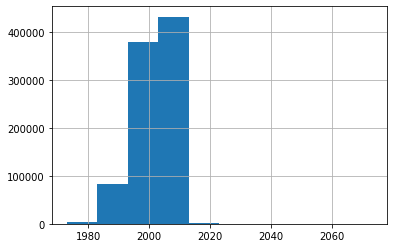

In [ ]:
#To simplicity, as we don´t need all the information, we´ll cut the dataset to make it smaller for faster procedures:
print(loans['ApprovalDate'].describe() )
loans['ApprovalDate'].hist()

In [4]:
loans[loans['ApprovalDate']>"2023"] #parse errors
loans=loans[(loans["ApprovalDate"]>"2001")&(loans["ApprovalDate"]<"2015")]
loans

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
12,1000146010,CARVEL,APEX,NC,27502,STEARNS BK NATL ASSOC,MN,445299,2006-02-07,2006,162,2,2.0,0,0,15100,1,N,N,NaT,2006-03-31,"$253,400.00",$0.00,P I F,$0.00,"$253,400.00","$190,050.00"
24,1000446006,SUBWAY,LITTLE ROCK,AR,72223,HOPE FCU,MS,722211,2006-02-07,2006,126,7,1.0,0,0,1,1,N,N,NaT,2006-04-30,"$137,300.00",$0.00,P I F,$0.00,"$137,300.00","$116,705.00"
28,1000506000,WEYLAND CORPORATION,CAMARILLO,CA,93010,WELLS FARGO BANK NATL ASSOC,SD,611110,2006-02-07,2006,83,18,2.0,5,23,1,1,Y,N,NaT,2006-02-28,"$438,541.00",$0.00,P I F,$0.00,"$100,000.00","$50,000.00"
30,1000516003,CHICAGO BRICK UNLIMITED INC,MIAMI,FL,33186,"CITIBANK, N.A.",FL,238140,2006-02-07,2006,84,4,1.0,0,4,1,1,Y,N,NaT,2006-02-28,"$51,440.00",$0.00,P I F,$0.00,"$35,000.00","$17,500.00"
32,1000526006,"RZI, INC.",NEW ORLEANS,LA,70130,BUSINESS RES. CAP. SPECIALTY B,LA,532490,2006-02-07,2006,60,3,1.0,0,0,1,1,N,N,NaT,2006-05-31,"$50,000.00",$0.00,P I F,$0.00,"$50,000.00","$42,500.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894809,9898154001,ARTESIA CABINETS,LAS VEGAS,NV,89118,NEVADA ST. DEVEL CORP,NV,235510,2006-02-06,2006,240,20,1.0,15,0,1,1,0,N,NaT,2007-05-16,"$509,000.00",$0.00,P I F,$0.00,"$509,000.00","$509,000.00"
894814,9898254007,VDL MOTOR SPORTS LLC,VAIL,AZ,85641,COMPASS BANK,AL,512110,2006-02-06,2006,84,3,1.0,0,3,1,1,Y,N,NaT,2006-02-28,"$15,635.00",$0.00,P I F,$0.00,"$10,000.00","$5,000.00"
894832,9898734009,"SHADHESHWAIR MATAJI, INC",BRIDGEVIEW,IL,60455,"SOMERCOR 504, INC.",IL,721110,2006-02-06,2006,240,10,1.0,0,1,1,1,0,N,NaT,2006-04-12,"$1,038,000.00",$0.00,P I F,$0.00,"$1,038,000.00","$1,038,000.00"
896097,9928233007,PAK MAIL OF BURLINGTON #397,BURLINGTON,NC,27215,"READYCAP LENDING, LLC",CA,0,2007-01-29,2007,84,2,2.0,0,0,61400,0,0,N,NaT,1997-05-31,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"


In [ ]:
#convert name as a type of an id:
loans["Name"].nunique() #hay 460850 unique businesses

460850

In [5]:
#for simplicity we are going to work with names as numbers
"""nuniquenames=list(loans["Name"].unique())
loans["busine"]=np.nan
for e,g in zip(nuniquenames,range(len(nuniquenames))):
  loans.loc[loans["Name"]==e,"busine"]=g""" #took a lot

loans["busine"] = pd.factorize(loans.Name)[0] + 1
loans


<ipython-input-5-bf833479d314>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans["busine"] = pd.factorize(loans.Name)[0] + 1


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,busine
12,1000146010,CARVEL,APEX,NC,27502,STEARNS BK NATL ASSOC,MN,445299,2006-02-07,2006,162,2,2.0,0,0,15100,1,N,N,NaT,2006-03-31,"$253,400.00",$0.00,P I F,$0.00,"$253,400.00","$190,050.00",1
24,1000446006,SUBWAY,LITTLE ROCK,AR,72223,HOPE FCU,MS,722211,2006-02-07,2006,126,7,1.0,0,0,1,1,N,N,NaT,2006-04-30,"$137,300.00",$0.00,P I F,$0.00,"$137,300.00","$116,705.00",2
28,1000506000,WEYLAND CORPORATION,CAMARILLO,CA,93010,WELLS FARGO BANK NATL ASSOC,SD,611110,2006-02-07,2006,83,18,2.0,5,23,1,1,Y,N,NaT,2006-02-28,"$438,541.00",$0.00,P I F,$0.00,"$100,000.00","$50,000.00",3
30,1000516003,CHICAGO BRICK UNLIMITED INC,MIAMI,FL,33186,"CITIBANK, N.A.",FL,238140,2006-02-07,2006,84,4,1.0,0,4,1,1,Y,N,NaT,2006-02-28,"$51,440.00",$0.00,P I F,$0.00,"$35,000.00","$17,500.00",4
32,1000526006,"RZI, INC.",NEW ORLEANS,LA,70130,BUSINESS RES. CAP. SPECIALTY B,LA,532490,2006-02-07,2006,60,3,1.0,0,0,1,1,N,N,NaT,2006-05-31,"$50,000.00",$0.00,P I F,$0.00,"$50,000.00","$42,500.00",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894809,9898154001,ARTESIA CABINETS,LAS VEGAS,NV,89118,NEVADA ST. DEVEL CORP,NV,235510,2006-02-06,2006,240,20,1.0,15,0,1,1,0,N,NaT,2007-05-16,"$509,000.00",$0.00,P I F,$0.00,"$509,000.00","$509,000.00",460846
894814,9898254007,VDL MOTOR SPORTS LLC,VAIL,AZ,85641,COMPASS BANK,AL,512110,2006-02-06,2006,84,3,1.0,0,3,1,1,Y,N,NaT,2006-02-28,"$15,635.00",$0.00,P I F,$0.00,"$10,000.00","$5,000.00",460847
894832,9898734009,"SHADHESHWAIR MATAJI, INC",BRIDGEVIEW,IL,60455,"SOMERCOR 504, INC.",IL,721110,2006-02-06,2006,240,10,1.0,0,1,1,1,0,N,NaT,2006-04-12,"$1,038,000.00",$0.00,P I F,$0.00,"$1,038,000.00","$1,038,000.00",460848
896097,9928233007,PAK MAIL OF BURLINGTON #397,BURLINGTON,NC,27215,"READYCAP LENDING, LLC",CA,0,2007-01-29,2007,84,2,2.0,0,0,61400,0,0,N,NaT,1997-05-31,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00",460849


In [6]:
#We don´t need some specific columns (like names, geographical specific locations, etc) so we will drop them :
dropcols=["Name","City","Zip","Bank","LoanNr_ChkDgt"]
cols=[e for e in loans.columns if e not in dropcols]
loans=loans[cols]
#loans.reset_index(inplace=True)
loans["index"]=loans.index
loans.rename(columns={"index":"ID"},inplace=True)
loans

<ipython-input-6-9b40297edb3b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans["index"]=loans.index
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,State,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,busine,ID
12,NC,MN,445299,2006-02-07,2006,162,2,2.0,0,0,15100,1,N,N,NaT,2006-03-31,"$253,400.00",$0.00,P I F,$0.00,"$253,400.00","$190,050.00",1,12
24,AR,MS,722211,2006-02-07,2006,126,7,1.0,0,0,1,1,N,N,NaT,2006-04-30,"$137,300.00",$0.00,P I F,$0.00,"$137,300.00","$116,705.00",2,24
28,CA,SD,611110,2006-02-07,2006,83,18,2.0,5,23,1,1,Y,N,NaT,2006-02-28,"$438,541.00",$0.00,P I F,$0.00,"$100,000.00","$50,000.00",3,28
30,FL,FL,238140,2006-02-07,2006,84,4,1.0,0,4,1,1,Y,N,NaT,2006-02-28,"$51,440.00",$0.00,P I F,$0.00,"$35,000.00","$17,500.00",4,30
32,LA,LA,532490,2006-02-07,2006,60,3,1.0,0,0,1,1,N,N,NaT,2006-05-31,"$50,000.00",$0.00,P I F,$0.00,"$50,000.00","$42,500.00",5,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894809,NV,NV,235510,2006-02-06,2006,240,20,1.0,15,0,1,1,0,N,NaT,2007-05-16,"$509,000.00",$0.00,P I F,$0.00,"$509,000.00","$509,000.00",460846,894809
894814,AZ,AL,512110,2006-02-06,2006,84,3,1.0,0,3,1,1,Y,N,NaT,2006-02-28,"$15,635.00",$0.00,P I F,$0.00,"$10,000.00","$5,000.00",460847,894814
894832,IL,IL,721110,2006-02-06,2006,240,10,1.0,0,1,1,1,0,N,NaT,2006-04-12,"$1,038,000.00",$0.00,P I F,$0.00,"$1,038,000.00","$1,038,000.00",460848,894832
896097,NC,CA,0,2007-01-29,2007,84,2,2.0,0,0,61400,0,0,N,NaT,1997-05-31,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00",460849,896097


In [ ]:
print(loans["State"].isna().sum())
loans["State"].value_counts()

In [7]:
"""
for e in range(len(loans)):
  if loans.loc[e,"State"]==loans.loc[e,"BankState"]:
    loans.loc[e,"same_state"]=1
  else:
    loans.loc[e,"same_state"]=0""" #took to long
loans["same_state"]=np.nan
loans.loc[loans["State"]==loans['BankState'],"same_state"]=1
loans.loc[loans["State"]!=loans['BankState'],"same_state"]=0

loans.drop(["State","BankState"],axis=1,inplace=True)
loans["same_state"].value_counts()

<ipython-input-7-b966a1c21832>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans["same_state"]=np.nan
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

0.0    303200
1.0    219411
Name: same_state, dtype: int64

In [8]:
loans.drop("ApprovalFY",axis=1,inplace=True)

In [9]:
loans.isna().sum() #we can drop ChgOffDate disbursement Date as it can be replaced with misstatus
loans.drop("ChgOffDate",axis=1,inplace=True)

In [10]:
loans["APPROVALtimestamp"] = loans.ApprovalDate.values.astype(np.int64) / 10 ** 9
loans["DISBURSEMENTtimestamp"] = loans.DisbursementDate.values.astype(np.int64) / 10 ** 9
loans["timediff"]=loans.DISBURSEMENTtimestamp-loans.APPROVALtimestamp
loans

<ipython-input-10-4d581cb80af3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans["APPROVALtimestamp"] = loans.ApprovalDate.values.astype(np.int64) / 10 ** 9
<ipython-input-10-4d581cb80af3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans["DISBURSEMENTtimestamp"] = loans.DisbursementDate.values.astype(np.int64) / 10 ** 9
<ipython-input-10-4d581cb80af3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

,NAICS,ApprovalDate,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,busine,ID,same_state,APPROVALtimestamp,DISBURSEMENTtimestamp,timediff
12,445299,2006-02-07,162,2,2.0,0,0,15100,1,N,N,2006-03-31,"$253,400.00",$0.00,P I F,$0.00,"$253,400.00","$190,050.00",1,12,0.0,1.139270e+09,1.143763e+09,4492800.0
24,722211,2006-02-07,126,7,1.0,0,0,1,1,N,N,2006-04-30,"$137,300.00",$0.00,P I F,$0.00,"$137,300.00","$116,705.00",2,24,0.0,1.139270e+09,1.146355e+09,7084800.0
28,611110,2006-02-07,83,18,2.0,5,23,1,1,Y,N,2006-02-28,"$438,541.00",$0.00,P I F,$0.00,"$100,000.00","$50,000.00",3,28,0.0,1.139270e+09,1.141085e+09,1814400.0
30,238140,2006-02-07,84,4,1.0,0,4,1,1,Y,N,2006-02-28,"$51,440.00",$0.00,P I F,$0.00,"$35,000.00","$17,500.00",4,30,1.0,1.139270e+09,1.141085e+09,1814400.0
32,532490,2006-02-07,60,3,1.0,0,0,1,1,N,N,2006-05-31,"$50,000.00",$0.00,P I F,$0.00,"$50,000.00","$42,500.00",5,32,1.0,1.139270e+09,1.149034e+09,9763200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894809,235510,2006-02-06,240,20,1.0,15,0,1,1,0,N,2007-05-16,"$509,000.00",$0.00,P I F,$0.00,"$509,000.00","$509,000.00",460846,894809,1.0,1.139184e+09,1.179274e+09,40089600.0
894814,512110,2006-02-06,84,3,1.0,0,3,1,1,Y,N,2006-02-28,"$15,635.00",$0.00,P I F,$0.00,"$10,000.00","$5,000.00",460847,894814,0.0,1.139184e+09,1.141085e+09,1900800.0
894832,721110,2006-02-06,240,10,1.0,0,1,1,1,0,N,2006-04-12,"$1,038,000.00",$0.00,P I F,$0.00,"$1,038,000.00","$1,038,000.00",460848,894832,1.0,1.139184e+09,1.144800e+09,5616000.0
896097,0,2007-01-29,84,2,2.0,0,0,61400,0,0,N,1997-05-31,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00",460849,896097,0.0,1.170029e+09,8.650368e+08,-304992000.0


In [11]:
print(loans["MIS_Status"].value_counts())
loans.rename(columns={"MIS_Status":"paid"},inplace=True)
loans.loc[loans["paid"]=="P I F","paid"]=1
loans.loc[loans["paid"]=="CHGOFF","paid"]=0
print(loans["paid"].value_counts())

P I F     390998
CHGOFF    129985
Name: MIS_Status, dtype: int64
1    390998
0    129985
Name: paid, dtype: int64


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [12]:
nonpaid=loans[loans["paid"]==0]
paid=loans[loans["paid"]==1]

In [13]:
#### Subsets
nonpaid
nonpaid_revolvingline=nonpaid[nonpaid['RevLineCr']=="Y"]
# nonpaid&revolvingline es un conjunto dentro de nonpaid (donde la empresa contó con el revolving line), que a su vez es otro subset dentro de la tabla total.
nonpaid_revolvingline

,NAICS,ApprovalDate,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,paid,ChgOffPrinGr,GrAppv,SBA_Appv,busine,ID,same_state,APPROVALtimestamp,DISBURSEMENTtimestamp,timediff
67,444220,2006-02-07,26,4,2.0,1,5,1,2,Y,N,2006-02-28,"$60,859.00",$0.00,0,"$19,994.00","$20,000.00","$10,000.00",12,67,0.0,1.139270e+09,1.141085e+09,1814400.0
89,561612,2006-02-07,54,4,1.0,8,4,1,2,Y,N,2006-02-28,"$76,432.00",$0.00,0,"$28,979.00","$30,000.00","$15,000.00",17,89,0.0,1.139270e+09,1.141085e+09,1814400.0
205,561440,2006-02-07,27,10,1.0,11,10,1,1,Y,N,2006-02-28,"$90,518.00",$0.00,0,"$49,415.00","$50,000.00","$25,000.00",26,205,0.0,1.139270e+09,1.141085e+09,1814400.0
264,484121,2006-02-07,32,1,1.0,1,1,1,1,Y,N,2006-02-28,"$153,553.00",$0.00,0,"$42,598.00","$45,000.00","$22,500.00",36,264,0.0,1.139270e+09,1.141085e+09,1814400.0
374,621111,2006-02-07,5,4,1.0,2,4,1,1,Y,N,2006-03-31,"$25,000.00",$0.00,0,"$24,660.00","$25,000.00","$12,500.00",43,374,1.0,1.139270e+09,1.143763e+09,4492800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894691,484110,2006-02-06,26,1,1.0,0,1,1,1,Y,N,2006-03-31,"$59,809.00",$0.00,0,"$29,445.00","$30,000.00","$15,000.00",460831,894691,0.0,1.139184e+09,1.143763e+09,4579200.0
894729,711510,2006-02-06,28,1,1.0,3,1,1,1,Y,N,2006-03-31,"$47,827.00",$0.00,0,"$14,994.00","$15,000.00","$7,500.00",460836,894729,0.0,1.139184e+09,1.143763e+09,4579200.0
894793,522310,2006-02-06,34,5,2.0,0,5,1,1,Y,N,2006-03-31,"$160,456.00",$0.00,0,"$43,593.00","$60,000.00","$30,000.00",460841,894793,0.0,1.139184e+09,1.143763e+09,4579200.0
894794,423850,2006-02-06,7,6,1.0,1,7,1,1,Y,N,2006-02-28,"$120,899.00",$0.00,0,"$84,483.00","$85,000.00","$42,500.00",460842,894794,0.0,1.139184e+09,1.141085e+09,1900800.0


In [14]:
#prueba de que nonpaidrevolving line es un conjunto dentro de nonpaid:
nonpaid[nonpaid.index.isin(nonpaid_revolvingline.index)] #da igual al mismo subset de datos de arriba

,NAICS,ApprovalDate,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,paid,ChgOffPrinGr,GrAppv,SBA_Appv,busine,ID,same_state,APPROVALtimestamp,DISBURSEMENTtimestamp,timediff
67,444220,2006-02-07,26,4,2.0,1,5,1,2,Y,N,2006-02-28,"$60,859.00",$0.00,0,"$19,994.00","$20,000.00","$10,000.00",12,67,0.0,1.139270e+09,1.141085e+09,1814400.0
89,561612,2006-02-07,54,4,1.0,8,4,1,2,Y,N,2006-02-28,"$76,432.00",$0.00,0,"$28,979.00","$30,000.00","$15,000.00",17,89,0.0,1.139270e+09,1.141085e+09,1814400.0
205,561440,2006-02-07,27,10,1.0,11,10,1,1,Y,N,2006-02-28,"$90,518.00",$0.00,0,"$49,415.00","$50,000.00","$25,000.00",26,205,0.0,1.139270e+09,1.141085e+09,1814400.0
264,484121,2006-02-07,32,1,1.0,1,1,1,1,Y,N,2006-02-28,"$153,553.00",$0.00,0,"$42,598.00","$45,000.00","$22,500.00",36,264,0.0,1.139270e+09,1.141085e+09,1814400.0
374,621111,2006-02-07,5,4,1.0,2,4,1,1,Y,N,2006-03-31,"$25,000.00",$0.00,0,"$24,660.00","$25,000.00","$12,500.00",43,374,1.0,1.139270e+09,1.143763e+09,4492800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894691,484110,2006-02-06,26,1,1.0,0,1,1,1,Y,N,2006-03-31,"$59,809.00",$0.00,0,"$29,445.00","$30,000.00","$15,000.00",460831,894691,0.0,1.139184e+09,1.143763e+09,4579200.0
894729,711510,2006-02-06,28,1,1.0,3,1,1,1,Y,N,2006-03-31,"$47,827.00",$0.00,0,"$14,994.00","$15,000.00","$7,500.00",460836,894729,0.0,1.139184e+09,1.143763e+09,4579200.0
894793,522310,2006-02-06,34,5,2.0,0,5,1,1,Y,N,2006-03-31,"$160,456.00",$0.00,0,"$43,593.00","$60,000.00","$30,000.00",460841,894793,0.0,1.139184e+09,1.143763e+09,4579200.0
894794,423850,2006-02-06,7,6,1.0,1,7,1,1,Y,N,2006-02-28,"$120,899.00",$0.00,0,"$84,483.00","$85,000.00","$42,500.00",460842,894794,0.0,1.139184e+09,1.141085e+09,1900800.0


In [ ]:
# Grupos
loans

,NAICS,ApprovalDate,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,paid,ChgOffPrinGr,GrAppv,SBA_Appv,busine,ID,same_state,APPROVALtimestamp,DISBURSEMENTtimestamp,timediff
12,445299,2006-02-07,162,2,2.0,0,0,15100,1,N,N,2006-03-31,"$253,400.00",$0.00,1,$0.00,"$253,400.00","$190,050.00",1,12,0.0,1.139270e+09,1.143763e+09,4492800.0
24,722211,2006-02-07,126,7,1.0,0,0,1,1,N,N,2006-04-30,"$137,300.00",$0.00,1,$0.00,"$137,300.00","$116,705.00",2,24,0.0,1.139270e+09,1.146355e+09,7084800.0
28,611110,2006-02-07,83,18,2.0,5,23,1,1,Y,N,2006-02-28,"$438,541.00",$0.00,1,$0.00,"$100,000.00","$50,000.00",3,28,0.0,1.139270e+09,1.141085e+09,1814400.0
30,238140,2006-02-07,84,4,1.0,0,4,1,1,Y,N,2006-02-28,"$51,440.00",$0.00,1,$0.00,"$35,000.00","$17,500.00",4,30,1.0,1.139270e+09,1.141085e+09,1814400.0
32,532490,2006-02-07,60,3,1.0,0,0,1,1,N,N,2006-05-31,"$50,000.00",$0.00,1,$0.00,"$50,000.00","$42,500.00",5,32,1.0,1.139270e+09,1.149034e+09,9763200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894809,235510,2006-02-06,240,20,1.0,15,0,1,1,0,N,2007-05-16,"$509,000.00",$0.00,1,$0.00,"$509,000.00","$509,000.00",460846,894809,1.0,1.139184e+09,1.179274e+09,40089600.0
894814,512110,2006-02-06,84,3,1.0,0,3,1,1,Y,N,2006-02-28,"$15,635.00",$0.00,1,$0.00,"$10,000.00","$5,000.00",460847,894814,0.0,1.139184e+09,1.141085e+09,1900800.0
894832,721110,2006-02-06,240,10,1.0,0,1,1,1,0,N,2006-04-12,"$1,038,000.00",$0.00,1,$0.00,"$1,038,000.00","$1,038,000.00",460848,894832,1.0,1.139184e+09,1.144800e+09,5616000.0
896097,0,2007-01-29,84,2,2.0,0,0,61400,0,0,N,1997-05-31,"$60,000.00",$0.00,1,$0.00,"$60,000.00","$48,000.00",460849,896097,0.0,1.170029e+09,8.650368e+08,-304992000.0


In [15]:
cols=["DisbursementGross","BalanceGross","ChgOffPrinGr","GrAppv","SBA_Appv"]
for e in cols:
  loans[e]=loans[e].str.replace("$","")
  loans[e]=loans[e].str.replace(",","")
  loans[e]=loans[e].astype(float)
  print(loans[e].dtype)
loans

<ipython-input-15-955db02ff5be>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  loans[e]=loans[e].str.replace("$","")
<ipython-input-15-955db02ff5be>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans[e]=loans[e].str.replace("$","")
<ipython-input-15-955db02ff5be>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans[e]=loans[e].str.replace(",","

float64
float64
float64
float64
float64


,NAICS,ApprovalDate,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,paid,ChgOffPrinGr,GrAppv,SBA_Appv,busine,ID,same_state,APPROVALtimestamp,DISBURSEMENTtimestamp,timediff
12,445299,2006-02-07,162,2,2.0,0,0,15100,1,N,N,2006-03-31,253400.0,0.0,1,0.0,253400.0,190050.0,1,12,0.0,1.139270e+09,1.143763e+09,4492800.0
24,722211,2006-02-07,126,7,1.0,0,0,1,1,N,N,2006-04-30,137300.0,0.0,1,0.0,137300.0,116705.0,2,24,0.0,1.139270e+09,1.146355e+09,7084800.0
28,611110,2006-02-07,83,18,2.0,5,23,1,1,Y,N,2006-02-28,438541.0,0.0,1,0.0,100000.0,50000.0,3,28,0.0,1.139270e+09,1.141085e+09,1814400.0
30,238140,2006-02-07,84,4,1.0,0,4,1,1,Y,N,2006-02-28,51440.0,0.0,1,0.0,35000.0,17500.0,4,30,1.0,1.139270e+09,1.141085e+09,1814400.0
32,532490,2006-02-07,60,3,1.0,0,0,1,1,N,N,2006-05-31,50000.0,0.0,1,0.0,50000.0,42500.0,5,32,1.0,1.139270e+09,1.149034e+09,9763200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894809,235510,2006-02-06,240,20,1.0,15,0,1,1,0,N,2007-05-16,509000.0,0.0,1,0.0,509000.0,509000.0,460846,894809,1.0,1.139184e+09,1.179274e+09,40089600.0
894814,512110,2006-02-06,84,3,1.0,0,3,1,1,Y,N,2006-02-28,15635.0,0.0,1,0.0,10000.0,5000.0,460847,894814,0.0,1.139184e+09,1.141085e+09,1900800.0
894832,721110,2006-02-06,240,10,1.0,0,1,1,1,0,N,2006-04-12,1038000.0,0.0,1,0.0,1038000.0,1038000.0,460848,894832,1.0,1.139184e+09,1.144800e+09,5616000.0
896097,0,2007-01-29,84,2,2.0,0,0,61400,0,0,N,1997-05-31,60000.0,0.0,1,0.0,60000.0,48000.0,460849,896097,0.0,1.170029e+09,8.650368e+08,-304992000.0


In [16]:
groupbyemp=pd.DataFrame()
groupbyemp["loans"]=loans.groupby("busine")["ID"].nunique()
groupbyemp["DisbursementGross"]=loans.groupby("busine")["DisbursementGross"].sum()
groupbyemp["BalanceGross"]=loans.groupby("busine")["BalanceGross"].sum()
groupbyemp["Num of loans paid"]=loans.groupby("busine")["paid"].sum()
groupbyemp


,loans,DisbursementGross,BalanceGross,Num of loans paid
busine,,,,
0,7,1434544.0,0.0,6
1,21,4133797.0,0.0,13
2,859,121907126.0,0.0,799
3,1,438541.0,0.0,1
4,1,51440.0,0.0,1
...,...,...,...,...
460846,1,509000.0,0.0,1
460847,1,15635.0,0.0,1
460848,1,1038000.0,0.0,1


In [ ]:
loans_train = loans.sample(frac = 0.7)
x_train = loans_train.loc[:, loans_train.columns != 'paid']
y_train = loans_train[['paid']]

In [ ]:
loans_valtest = loans.drop(loans_train.index)
loans_val=loans_valtest.sample(frac=0.4)            #deje un espacio para un validation set, no lo defini completamente porque no se si usarlo
loans_test=loans_valtest.drop(loans_val.index)
x_test = loans_test.loc[:, loans_test.columns != 'paid']
y_test = loans_test[['paid']]

In [ ]:
print("x_train dim:",x_train.shape)
print("y_train dim:",len(y_train))
print("x_test dim:",x_test.shape)
print("y_test dim:",len(y_test))
print("validation dim:",(loans_valtest.shape))


x_train dim: (365828, 23)
y_train dim: 365828
x_test dim: (94070, 23)
y_test dim: 94070
validation dim: (156783, 24)


In [ ]:
print(len(loans))
len(loans_train)+len(loans_test)+len(loans_val)

522611


522611

In [ ]:
path="C:/Users/HUGO/Desktop/Maestria en CIENCIA DE DATOS UANL/Aprendizaje automatico/"
loans.to_csv(path+"loansmodified1.csv",index=False)
groupbyemp.to_csv(path+"groupsloans.csv",index=False)

FileNotFoundError: ignored

## Funciones para calcular: 
- media 
- moda
- mediana

- varianza
-desv estandar

In [17]:
def media(df,column):
  df2=df[~df[str(column)].isna()]
  return(sum(df2[str(column)])/len(df2[str(column)])) 

def moda(df,column):
  df2=df[~df[str(column)].isna()]
  l=list(df2[str(column)].unique())
  lens=[]
  for e in l:
    count=len(df2[df2[str(column)]==e])
    lens.append(count)

  max_value = max(lens)
  index = lens.index(max_value)
  moda=l[index]

  return(moda)

def mediana(df,column):
  df2=df[~df[str(column)].isna()]
  x=list(df2[str(column)].sort_values())
  length=len(x)/2
  if length % 2!= 0:
        return x[int(length - .5)]
  else:
        return (x[int(length)], x[int(length-1)])

def varianza(df,column):
  df2=df[~df[str(column)].isna()]
  promedio=media(df,column)
  calculos=0
  l=list(df2[column])
  for e in l:
    calculos+=round((e-promedio)**2,5)
  varianza=calculos/len(l)
  return varianza

def desvest(df,column):
  var=varianza(df,column)
  desvest=var**(1/2)
  return desvest

In [18]:
print("media: ",media(loans,"NoEmp"))
print("moda: ",moda(loans,"NoEmp"))
print("mediana: ",mediana(loans,"NoEmp"))
print("varianza: ",varianza(loans,"NoEmp"))
print("desviación estandar: ",desvest(loans,"NoEmp"))

media:  8.461722007382164
moda:  1
mediana:  3
varianza:  1878.2731929745837
desviación estandar:  43.339049285541364


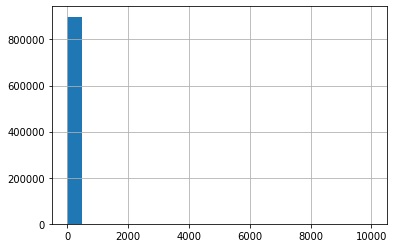

In [ ]:
# Aplicar bondad de ajuste
loans.NoEmp.hist(bins = 20)

In [19]:
from scipy.stats import shapiro

stat, p = shapiro(loans.NoEmp.values)
alpha = 0.05
if p < alpha:
    print(f'La distribución no parece normal con p = {round(p, 4)}')
else:
    print(f'La distribución parece normal con p = {round(p, 4)} ')

La distribución no parece normal con p = 0.0


/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [20]:
loans["RevLineCr"]=loans["RevLineCr"].map(lambda x: 1 if x == "Y" else 0)
loans["LowDoc"]=loans["LowDoc"].map(lambda x: 1 if x == "Y" else 0)
numericalcolumns=["Term","NoEmp","NewExist","CreateJob","RetainedJob","UrbanRural","RevLineCr","LowDoc","DisbursementGross",	"BalanceGross",	"paid",	"ChgOffPrinGr", "same_state"]


<ipython-input-20-d50752d75350>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans["RevLineCr"]=loans["RevLineCr"].map(lambda x: 1 if x == "Y" else 0)
<ipython-input-20-d50752d75350>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans["LowDoc"]=loans["LowDoc"].map(lambda x: 1 if x == "Y" else 0)


Calculo descriptivos

In [21]:
statistics={e:{"media":[],"moda":[],"mediana":[],"varianza":[],"desviación estandar":[]} for e in numericalcolumns}
calcs=[]
for e in (numericalcolumns):
  med=media(loans,e)
  mod=moda(loans,e)
  median=mediana(loans,e)
  var=varianza(loans,e)
  desv=desvest(loans,e)
  calcs.append(med)
  calcs.append(mod)
  calcs.append(median)
  calcs.append(var)
  calcs.append(desv)

In [22]:
for e,g in zip(calcs,statistics):
  for h in statistics[g]:
    statistics[g][h].append(e)
statistics

{'Term': {'media': [92.45401455384598],
  'moda': [92.45401455384598],
  'mediana': [92.45401455384598],
  'varianza': [92.45401455384598],
  'desviación estandar': [92.45401455384598]},
 'NoEmp': {'media': [84],
  'moda': [84],
  'mediana': [84],
  'varianza': [84],
  'desviación estandar': [84]},
 'NewExist': {'media': [84],
  'moda': [84],
  'mediana': [84],
  'varianza': [84],
  'desviación estandar': [84]},
 'CreateJob': {'media': [4524.962733289831],
  'moda': [4524.962733289831],
  'mediana': [4524.962733289831],
  'varianza': [4524.962733289831],
  'desviación estandar': [4524.962733289831]},
 'RetainedJob': {'media': [67.26784323352304],
  'moda': [67.26784323352304],
  'mediana': [67.26784323352304],
  'varianza': [67.26784323352304],
  'desviación estandar': [67.26784323352304]},
 'UrbanRural': {'media': [8.461722007382164],
  'moda': [8.461722007382164],
  'mediana': [8.461722007382164],
  'varianza': [8.461722007382164],
  'desviación estandar': [8.461722007382164]},
 'Rev

In [ ]:
# O simplemente se puede hacer lo sig
for e in numericalcolumns:
  print(loans[e].describe())

count    522611.000000
mean         92.454015
std          67.267908
min           0.000000
25%          59.000000
50%          84.000000
75%          88.000000
max         569.000000
Name: Term, dtype: float64
count    522611.000000
mean          8.461722
std          43.339091
min           0.000000
25%           2.000000
50%           3.000000
75%           8.000000
max        8000.000000
Name: NoEmp, dtype: float64
count    522475.000000
mean          1.283661
std           0.452703
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           2.000000
Name: NewExist, dtype: float64
count    522611.000000
mean          2.356035
std          13.033754
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max        5085.000000
Name: CreateJob, dtype: float64
count    522611.000000
mean          5.947387
std          22.230846
min           0.000000
25%           1.000000
50%           2.000000
75%     

In [ ]:
loansnum.dtypes

Matriz de correlacion

In [23]:
import matplotlib.pyplot as plt


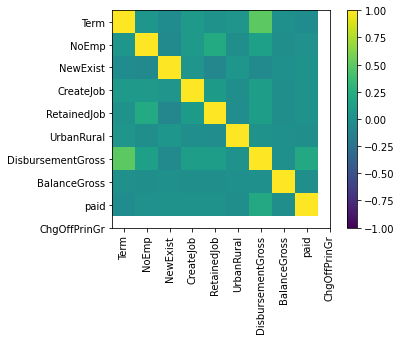

In [24]:
null=["RevLineCr","LowDoc","same_state"] #var dicotomicas
numericalcolumns2=[e for e in numericalcolumns if e not in null]
loansnum=loans[numericalcolumns2]
corr_ = loansnum.corr()
ticks_ = list(range(len(loansnum.columns)))
plt.figure()
plt.imshow(corr_)
plt.xticks(ticks = ticks_, labels = loansnum.columns, rotation = 90)
plt.yticks(ticks = ticks_, labels = loansnum.columns)
plt.clim(vmin = -1, vmax = 1)
plt.colorbar()
plt.show()

La mayoría de las variables tienen correlaciones despreciables entre si debido a que rondan alrededor del 0 (sin importar si el sentido de la relación es positiva o negativa). Sin embargo, hay algunas correlaciones entre las variables que destacan, como la que existe entre Term (plazo en número de meses) y DisbursementGross (cantidad que se paga en el préstamo), y es en sentido positivo, por lo que a mayor plazo en numéro de meses, mayor es la cantidad que se paga de prestamo (coef de alrededor de 0.60).

Esa es la que más destaca. Otras de manera más sutil pueden ser las interacciones entre NoEmp y RetainedJob (alrededor de 0.35), que es básicamente la relacion de numero de empleados y empleos retenidos.

In [32]:
#Prueba de hipotesis:

#Compararemos si la media del DisbursementGross aumenta a medida que aumentan los Terms
loans["Term"].describe() #usaremos la media en este caso: 92.45 meses
disbursementbajo=loans[loans["Term"]<=92.45][["Term","DisbursementGross"]]
disbursementtermalto=loans[loans["Term"]>92.45][["Term","DisbursementGross"]]
loans["Terms_comp"]=np.nan
loans.loc[loans.Term<=92.45,"Terms_comp"]="Bajo"
loans.loc[loans.Term<=92.45,"Terms_comp"]="ALto"



<ipython-input-32-466ce9a44690>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans["Terms_comp"]=np.nan
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


/usr/local/lib/python3.8/dist-packages/joypy/joyplot.py:543: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  last_axis = fig.add_subplot(1, 1, 1)


<Figure size 432x288 with 0 Axes>

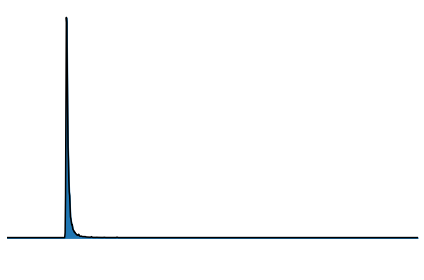

In [30]:
#!pip install joypy
from joypy import joyplot

plt.figure()
joyplot(loans, by='Terms_comp', column='DisbursementGross' )
plt.show()

In [36]:
#Hay evidencia para decir que entre mas term, mayor el disbursement gross?
#H0 = Media Disbursement (Term > 92 meses) - Media Disbursement (Term < 92 meses) =  0  #son iguales
#HA = Media Disbursement (Term > 92 meses) - Media Disbursement (Term < 92 meses) !=  0  #son diferentes, si hay evidencia

#usaremos t.test a una confianza del 95% (alfa=0.05)
alfa=0.05
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(disbursementtermalto["DisbursementGross"].values, disbursementbajo["DisbursementGross"].values)
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

if p < alfa:
    print(f'Rechazamos la H0 de que sean iguales las medias independientemente del term, por lo tanto, SI cambian dependiendo el term  (pvalue= {round(p, 4)})')
else:
    print(f'No Rechazamos la H0 de que sean iguales las medias independientemente del term, por lo tanto, NO cambian dependiendo el term = {round(p, 4)} ')

T-statistic value:  386.3068856130423
P-Value:  0.0
Rechazamos la H0 de que sean iguales las medias independientemente del term, por lo tanto, SI cambian dependiendo el term  (pvalue= 0.0)
